In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the path based on where you uploaded it)
file_path = '/content/drive/My Drive/creditcard.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Verify the data loaded
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 


Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
7

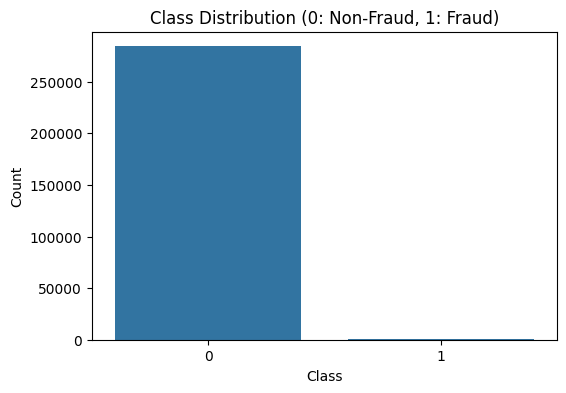

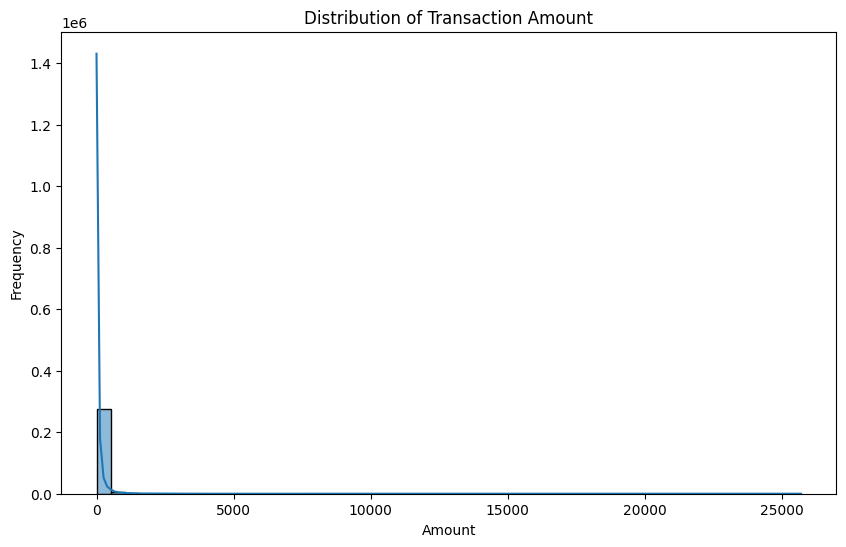

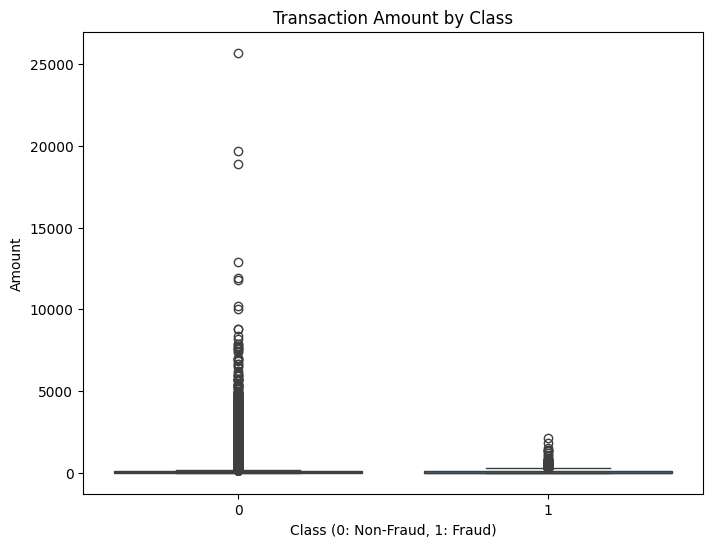

In [4]:

# 1. Check for missing values (redundant, but confirming)
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# 2. Basic statistical summary
print("\nStatistical Summary:")
print(data.describe())

# 3. Class distribution
print("\nClass Distribution:")
print(data['Class'].value_counts())
print("\nFraud Percentage:", (data['Class'].value_counts()[1] / len(data)) * 100)

# 4. Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 5. Visualize 'Amount' distribution (to check for outliers)
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# 6. Boxplot of 'Amount' by 'Class' to explore differences
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.show()


First 5 Rows with Updated Time:
                 Time  Amount  Class
0 2013-01-01 00:00:00  149.62      0
1 2013-01-01 00:00:00    2.69      0
2 2013-01-01 00:00:01  378.66      0
3 2013-01-01 00:00:01  123.50      0
4 2013-01-01 00:00:02   69.99      0

Data Types After Conversion:
Time      datetime64[ns]
V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28            

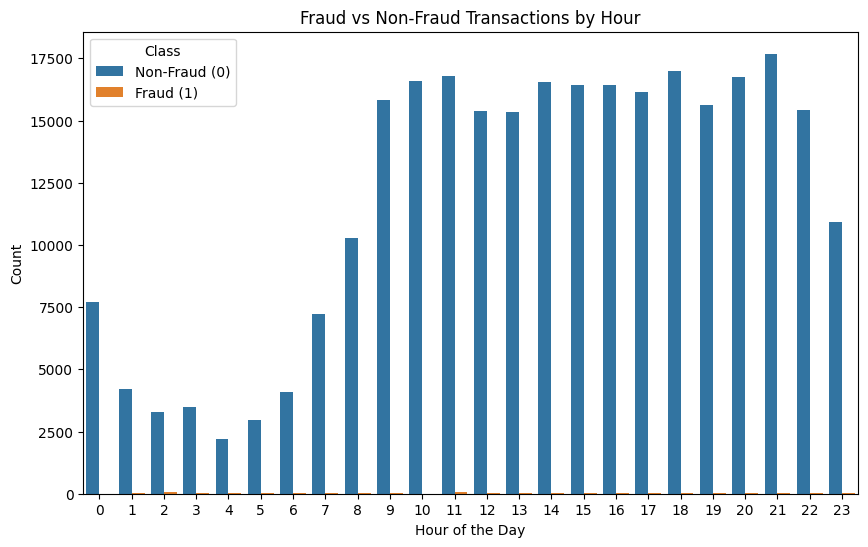

In [5]:
reference_date = pd.to_datetime('2013-01-01 00:00:00')
data['Time'] = reference_date + pd.to_timedelta(data['Time'], unit='s')

# Verify the conversion
print("\nFirst 5 Rows with Updated Time:")
print(data[['Time', 'Amount', 'Class']].head())

# Check the datatype of Time
print("\nData Types After Conversion:")
print(data.dtypes)

# Optional: Extract time-based features (e.g., hour of the day)
data['Hour'] = data['Time'].dt.hour

# Visualize fraud occurrences by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', hue='Class', data=data)
plt.title('Fraud vs Non-Fraud Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

In [6]:
# Import necessary libraries for preprocessing and modeling
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Drop the 'Time' column since we have extracted 'Hour'
data = data.drop(columns=['Time'])

# Step 2: Scale the 'Amount' column (V1-V28 are already scaled due to PCA)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Step 3: Split the dataset into features (X) and target (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Step 4: Split the dataset into training and testing sets (before SMOTE)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the split
print("\nTraining Set Class Distribution (Before SMOTE):")
print(y_train_full.value_counts())
print("\nTesting Set Class Distribution:")
print(y_test_full.value_counts())

# Step 5: Apply SMOTE to the training set only to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_full, y_train_full)

# Verify the balanced training set
print("\nTraining Set Class Distribution (After SMOTE):")
print(y_train_balanced.value_counts())

# Step 6: Feature Selection using Random Forest (on balanced training set)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train_balanced.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 15 features
top_features = feature_importance_df['Feature'].head(15).values
print("\nTop 15 Features Selected:")
print(top_features)

# Subset the training and testing sets to the top 15 features
X_train_selected = X_train_balanced[top_features]
X_test_selected = X_test_full[top_features]

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Training Set Class Distribution (Before SMOTE):
Class
0    227451
1       394
Name: count, dtype: int64

Testing Set Class Distribution:
Class
0    56864
1       98
Name: count, dtype: int64

Training Set Class Distribution (After SMOTE):
Class
0    227451
1    227451
Name: count, dtype: int64

Top 15 Features Selected:
['V14' 'V10' 'V4' 'V17' 'V12' 'V11' 'V3' 'V16' 'V7' 'V2' 'V8' 'V9' 'V21'
 'V27' 'V18']


In [8]:
# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve
import pandas as pd
import numpy as np

# Step 1: Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(
        subsample=0.8,
        n_estimators=200,
        max_depth=7,
        learning_rate=0.3,
        colsample_bytree=1.0,
        eval_metric='logloss',
        random_state=42
    )
}

# Dictionaries to store results
results_train = {}
results_test = {}

# Step 2: Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name} on balanced training set (selected features)...")
    model.fit(X_train_selected, y_train_balanced)

    # Evaluate on the balanced training set
    y_pred_train = model.predict(X_train_selected)
    y_pred_proba_train = model.predict_proba(X_train_selected)[:, 1]

    # Calculate metrics for training set
    accuracy_train = accuracy_score(y_train_balanced, y_pred_train)
    precision_train = precision_score(y_train_balanced, y_pred_train)
    recall_train = recall_score(y_train_balanced, y_pred_train)
    f1_train = f1_score(y_train_balanced, y_pred_train)
    auc_roc_train = roc_auc_score(y_train_balanced, y_pred_proba_train)

    results_train[model_name] = {
        'Accuracy': accuracy_train,
        'Precision': precision_train,
        'Recall': recall_train,
        'F1-Score': f1_train,
        'AUC-ROC': auc_roc_train
    }

    print(f"\n{model_name} Performance on Balanced Training Set:")
    print(f"Accuracy: {accuracy_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"F1-Score: {f1_train:.4f}")
    print(f"AUC-ROC: {auc_roc_train:.4f}")
    print(f"\nClassification Report for {model_name} on Balanced Training Set:")
    print(classification_report(y_train_balanced, y_pred_train, target_names=['Non-Fraud (0)', 'Fraud (1)']))

    # Evaluate on the unbalanced test set
    y_pred_test = model.predict(X_test_selected)
    y_pred_proba_test = model.predict_proba(X_test_selected)[:, 1]

    # Calculate metrics for test set
    accuracy_test = accuracy_score(y_test_full, y_pred_test)
    precision_test = precision_score(y_test_full, y_pred_test)
    recall_test = recall_score(y_test_full, y_pred_test)
    f1_test = f1_score(y_test_full, y_pred_test)
    auc_roc_test = roc_auc_score(y_test_full, y_pred_proba_test)

    results_test[model_name] = {
        'Accuracy': accuracy_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1-Score': f1_test,
        'AUC-ROC': auc_roc_test,
        'y_pred_proba_test': y_pred_proba_test  # Store probabilities for threshold adjustment
    }

    print(f"\n{model_name} Performance on Unbalanced Test Set:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1-Score: {f1_test:.4f}")
    print(f"AUC-ROC: {auc_roc_test:.4f}")
    print(f"\nClassification Report for {model_name} on Unbalanced Test Set:")
    print(classification_report(y_test_full, y_pred_test, target_names=['Non-Fraud (0)', 'Fraud (1)']))

# Step 3: Display results in DataFrames
print("\nModel Comparison on Balanced Training Set:")
print(pd.DataFrame(results_train).T)
print("\nModel Comparison on Unbalanced Test Set:")
print(pd.DataFrame({k: v for k, v in results_test.items() if k != 'y_pred_proba_test'}).T)

# Step 4: Select the best model based on F1-score for fraud on the test set
best_model_name = max(results_test, key=lambda x: results_test[x]['F1-Score'])
best_model = models[best_model_name]
print(f"\nBest Model (based on F1-Score for fraud on test set): {best_model_name}")

# Step 5: Reduce overfitting for Random Forest (if it's the best model)
if best_model_name == 'Random Forest':
    print("\nReducing overfitting for Random Forest...")
    rf_reduced = RandomForestClassifier(
        n_estimators=50,  # Reduce number of trees
        max_depth=10,     # Limit tree depth
        random_state=42
    )
    print("\nTraining Random Forest (Reduced Complexity) on balanced training set...")
    rf_reduced.fit(X_train_selected, y_train_balanced)

    # Evaluate on the balanced training set
    y_pred_train_rf = rf_reduced.predict(X_train_selected)
    y_pred_proba_train_rf = rf_reduced.predict_proba(X_train_selected)[:, 1]

    # Calculate metrics for training set
    accuracy_train_rf = accuracy_score(y_train_balanced, y_pred_train_rf)
    precision_train_rf = precision_score(y_train_balanced, y_pred_train_rf)
    recall_train_rf = recall_score(y_train_balanced, y_pred_train_rf)
    f1_train_rf = f1_score(y_train_balanced, y_pred_train_rf)
    auc_roc_train_rf = roc_auc_score(y_train_balanced, y_pred_proba_train_rf)

    print("\nRandom Forest (Reduced Complexity) Performance on Balanced Training Set:")
    print(f"Accuracy: {accuracy_train_rf:.4f}")
    print(f"Precision: {precision_train_rf:.4f}")
    print(f"Recall: {recall_train_rf:.4f}")
    print(f"F1-Score: {f1_train_rf:.4f}")
    print(f"AUC-ROC: {auc_roc_train_rf:.4f}")
    print("\nClassification Report for Random Forest (Reduced Complexity) on Balanced Training Set:")
    print(classification_report(y_train_balanced, y_pred_train_rf, target_names=['Non-Fraud (0)', 'Fraud (1)']))

    # Evaluate on the unbalanced test set
    y_pred_test_rf = rf_reduced.predict(X_test_selected)
    y_pred_proba_test_rf = rf_reduced.predict_proba(X_test_selected)[:, 1]

    # Calculate metrics for test set
    accuracy_test_rf = accuracy_score(y_test_full, y_pred_test_rf)
    precision_test_rf = precision_score(y_test_full, y_pred_test_rf)
    recall_test_rf = recall_score(y_test_full, y_pred_test_rf)
    f1_test_rf = f1_score(y_test_full, y_pred_test_rf)
    auc_roc_test_rf = roc_auc_score(y_test_full, y_pred_proba_test_rf)

    print("\nRandom Forest (Reduced Complexity) Performance on Unbalanced Test Set:")
    print(f"Accuracy: {accuracy_test_rf:.4f}")
    print(f"Precision: {precision_test_rf:.4f}")
    print(f"Recall: {recall_test_rf:.4f}")
    print(f"F1-Score: {f1_test_rf:.4f}")
    print(f"AUC-ROC: {auc_roc_test_rf:.4f}")
    print("\nClassification Report for Random Forest (Reduced Complexity) on Unbalanced Test Set:")
    print(classification_report(y_test_full, y_pred_test_rf, target_names=['Non-Fraud (0)', 'Fraud (1)']))

    # Update best model and probabilities for threshold adjustment
    best_model = rf_reduced
    y_pred_proba_test_best = y_pred_proba_test_rf
else:
    y_pred_proba_test_best = results_test[best_model_name]['y_pred_proba_test']

# Step 6: Adjust the decision threshold for the best model
precisions, recalls, thresholds = precision_recall_curve(y_test_full, y_pred_proba_test_best)

# Find thresholds for different recall targets
target_recall = 0.95
threshold_recall_95 = thresholds[np.argmax(recalls >= target_recall)]
print(f"\nThreshold for Recall >= {target_recall} (for {best_model_name}): {threshold_recall_95:.4f}")

# Try manual thresholds to balance recall and precision
thresholds_manual = [0.1, 0.3, 0.5, 0.7, 0.9]

for threshold in [threshold_recall_95] + thresholds_manual:
    y_pred_adjusted = (y_pred_proba_test_best >= threshold).astype(int)

    # Calculate metrics
    accuracy_adjusted = accuracy_score(y_test_full, y_pred_adjusted)
    precision_adjusted = precision_score(y_test_full, y_pred_adjusted)
    recall_adjusted = recall_score(y_test_full, y_pred_adjusted)
    f1_adjusted = f1_score(y_test_full, y_pred_adjusted)
    auc_roc_adjusted = roc_auc_score(y_test_full, y_pred_proba_test_best)

    print(f"\n{best_model_name} Performance with Threshold = {threshold:.4f}:")
    print(f"Accuracy: {accuracy_adjusted:.4f}")
    print(f"Precision: {precision_adjusted:.4f}")
    print(f"Recall: {recall_adjusted:.4f}")
    print(f"F1-Score: {f1_adjusted:.4f}")
    print(f"AUC-ROC: {auc_roc_adjusted:.4f}")
    print(f"\nClassification Report with Threshold = {threshold:.4f}:")
    print(classification_report(y_test_full, y_pred_adjusted, target_names=['Non-Fraud (0)', 'Fraud (1)']))


Training Logistic Regression on balanced training set (selected features)...

Logistic Regression Performance on Balanced Training Set:
Accuracy: 0.9412
Precision: 0.9705
Recall: 0.9100
F1-Score: 0.9393
AUC-ROC: 0.9890

Classification Report for Logistic Regression on Balanced Training Set:
               precision    recall  f1-score   support

Non-Fraud (0)       0.92      0.97      0.94    227451
    Fraud (1)       0.97      0.91      0.94    227451

     accuracy                           0.94    454902
    macro avg       0.94      0.94      0.94    454902
 weighted avg       0.94      0.94      0.94    454902


Logistic Regression Performance on Unbalanced Test Set:
Accuracy: 0.9706
Precision: 0.0513
Recall: 0.9184
F1-Score: 0.0972
AUC-ROC: 0.9757

Classification Report for Logistic Regression on Unbalanced Test Set:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.97      0.99     56864
    Fraud (1)       0.05      0.92      0.10        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Performance with Threshold = 0.3000:
Accuracy: 0.9761
Precision: 0.0612
Recall: 0.8980
F1-Score: 0.1145
AUC-ROC: 0.9781

Classification Report with Threshold = 0.3000:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     56864
    Fraud (1)       0.06      0.90      0.11        98

     accuracy                           0.98     56962
    macro avg       0.53      0.94      0.55     56962
 weighted avg       1.00      0.98      0.99     56962


Random Forest Performance with Threshold = 0.5000:
Accuracy: 0.9947
Precision: 0.2270
Recall: 0.8571
F1-Score: 0.3590
AUC-ROC: 0.9781

Classification Report with Threshold = 0.5000:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.99      1.00     56864
    Fraud (1)       0.23      0.86      0.36        98

     accuracy                           0.99     56962
    macro avg       0.61      0.93      0.68     56962
 weighted avg       1.00

In [9]:
# Use the original Random Forest model (stored in 'models')
original_rf = models['Random Forest']
y_pred_proba_test_original_rf = results_test['Random Forest']['y_pred_proba_test']

# Adjust the decision threshold for the original Random Forest
precisions, recalls, thresholds = precision_recall_curve(y_test_full, y_pred_proba_test_original_rf)

# Find threshold for recall >= 0.9
target_recall = 0.9
threshold_recall_90 = thresholds[np.argmax(recalls >= target_recall)]
print(f"\nThreshold for Recall >= {target_recall} (for Original Random Forest): {threshold_recall_90:.4f}")

# Try manual thresholds to balance recall and precision
thresholds_manual = [0.1, 0.3, 0.5, 0.7, 0.9]

for threshold in [threshold_recall_90] + thresholds_manual:
    y_pred_adjusted = (y_pred_proba_test_original_rf >= threshold).astype(int)

    # Calculate metrics
    accuracy_adjusted = accuracy_score(y_test_full, y_pred_adjusted)
    precision_adjusted = precision_score(y_test_full, y_pred_adjusted)
    recall_adjusted = recall_score(y_test_full, y_pred_adjusted)
    f1_adjusted = f1_score(y_test_full, y_pred_adjusted)
    auc_roc_adjusted = roc_auc_score(y_test_full, y_pred_proba_test_original_rf)

    print(f"\nOriginal Random Forest Performance with Threshold = {threshold:.4f}:")
    print(f"Accuracy: {accuracy_adjusted:.4f}")
    print(f"Precision: {precision_adjusted:.4f}")
    print(f"Recall: {recall_adjusted:.4f}")
    print(f"F1-Score: {f1_adjusted:.4f}")
    print(f"AUC-ROC: {auc_roc_adjusted:.4f}")
    print(f"\nClassification Report with Threshold = {threshold:.4f}:")
    print(classification_report(y_test_full, y_pred_adjusted, target_names=['Non-Fraud (0)', 'Fraud (1)']))


Threshold for Recall >= 0.9 (for Original Random Forest): 0.0000

Original Random Forest Performance with Threshold = 0.0000:
Accuracy: 0.0017
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
AUC-ROC: 0.9731

Classification Report with Threshold = 0.0000:
               precision    recall  f1-score   support

Non-Fraud (0)       0.00      0.00      0.00     56864
    Fraud (1)       0.00      1.00      0.00        98

     accuracy                           0.00     56962
    macro avg       0.00      0.50      0.00     56962
 weighted avg       0.00      0.00      0.00     56962


Original Random Forest Performance with Threshold = 0.1000:
Accuracy: 0.9924
Precision: 0.1742
Recall: 0.9082
F1-Score: 0.2923
AUC-ROC: 0.9731

Classification Report with Threshold = 0.1000:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.99      1.00     56864
    Fraud (1)       0.17      0.91      0.29        98

     accuracy                           0.99     5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.59      0.88      0.70        98

     accuracy                           1.00     56962
    macro avg       0.79      0.94      0.85     56962
 weighted avg       1.00      1.00      1.00     56962


Original Random Forest Performance with Threshold = 0.5000:
Accuracy: 0.9994
Precision: 0.8218
Recall: 0.8469
F1-Score: 0.8342
AUC-ROC: 0.9731

Classification Report with Threshold = 0.5000:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.82      0.85      0.83        98

     accuracy                           1.00     56962
    macro avg       0.91      0.92      0.92     56962
 weighted avg       1.00      1.00      1.00     56962


Original Random Forest Performance with Threshold = 0.7000:
Accuracy: 0.9995
Precision: 0.8764
Recall: 0.7959
F1-Score: 0.8342
AUC-ROC: 0.973

In [10]:
import joblib

# Save the original Random Forest model
joblib.dump(models['Random Forest'], '/content/drive/My Drive/credit_card_fraud_model_rf.pkl')

# Save the scaler (from preprocessing)
joblib.dump(scaler, '/content/drive/My Drive/scaler.pkl')

# Save the selected features
selected_features = top_features
joblib.dump(selected_features, '/content/drive/My Drive/selected_features.pkl')

# Save the optimal threshold
optimal_threshold = 0.3000
joblib.dump(optimal_threshold, '/content/drive/My Drive/optimal_threshold.pkl')

print("Model and preprocessing objects saved successfully!")

Model and preprocessing objects saved successfully!
